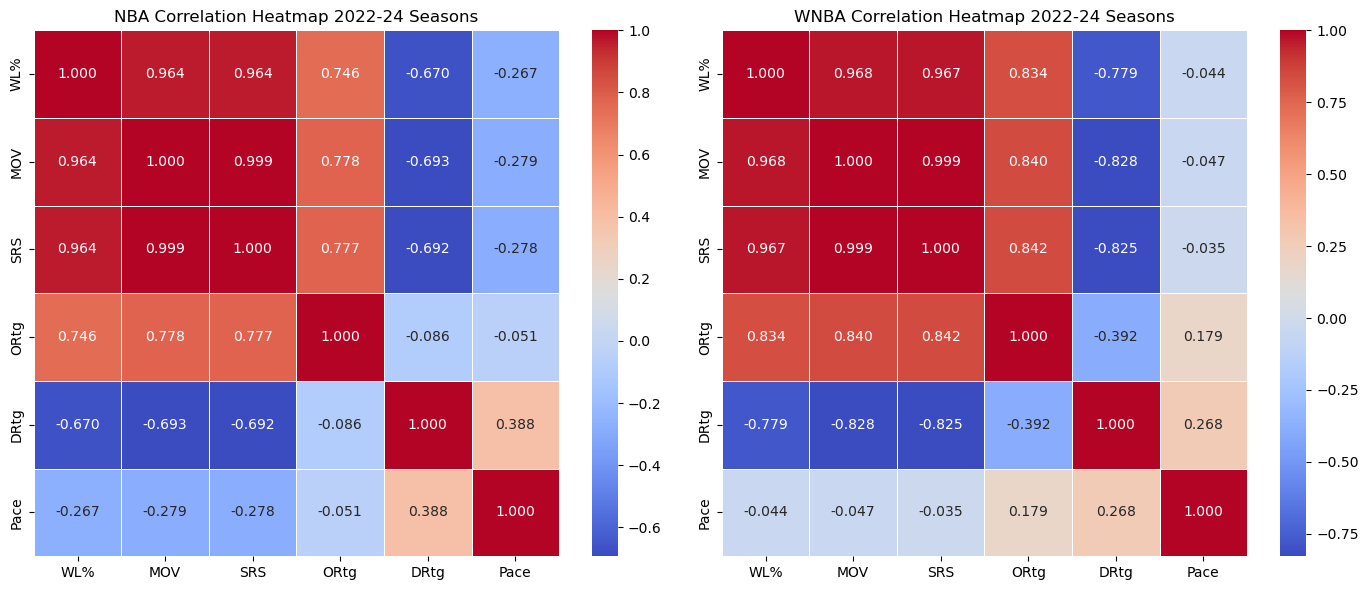

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Set the output PDF file
pdf_path = "/Users/lizvitai/Documents/PythonSports/all_graphs.pdf"
pdf = PdfPages(pdf_path)  # Create PDF object

# ==== STEP 1: Load the Data ====
nba_file = "/Users/lizvitai/Documents/PythonSports/nba_teams_2022_2023_2024_team_misc.csv"
wnba_file = "/Users/lizvitai/Documents/PythonSports/wnba_advanced_stats_cleaned.csv"

df_nba = pd.read_csv(nba_file)
df_wnba = pd.read_csv(wnba_file)

# ==== STEP 2: Remove ranking rows from NBA data ====
df_nba_cleaned = df_nba.groupby(["Team", "Season"]).first().reset_index()

# ==== STEP 3: Calculate Win Percentage (WL%) ====
df_nba_cleaned["WL%"] = df_nba_cleaned["W"] / (df_nba_cleaned["W"] + df_nba_cleaned["L"])
df_wnba["WL%"] = df_wnba["W"] / (df_wnba["W"] + df_wnba["L"])

# ==== STEP 4: Select Metrics (Keep SRS) ====
nba_metrics = df_nba_cleaned[["WL%", "MOV", "SRS", "ORtg", "DRtg", "Pace"]]
wnba_metrics = df_wnba[["WL%", "MOV", "SRS", "ORtg", "DRtg", "Pace"]]

# ==== STEP 5: Compute Correlations (Round to 3 Decimal Places) ====
nba_corr = nba_metrics.corr().round(3)  # Round to 3 decimal places
wnba_corr = wnba_metrics.corr().round(3)  # Round to 3 decimal places

# ==== STEP 6: Plot Heatmaps ====
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# NBA Heatmap
sns.heatmap(nba_corr, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[0], fmt=".3f")
axes[0].set_title("NBA Correlation Heatmap 2022-24 Seasons")

# WNBA Heatmap
sns.heatmap(wnba_corr, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[1], fmt=".3f")
axes[1].set_title("WNBA Correlation Heatmap 2022-24 Seasons")

plt.tight_layout()
plt.show()

# ==== SAVE FIGURE TO PDF ====
pdf.savefig(fig)  # Save to the PDF
plt.close(fig)  # Close the figure to free memory


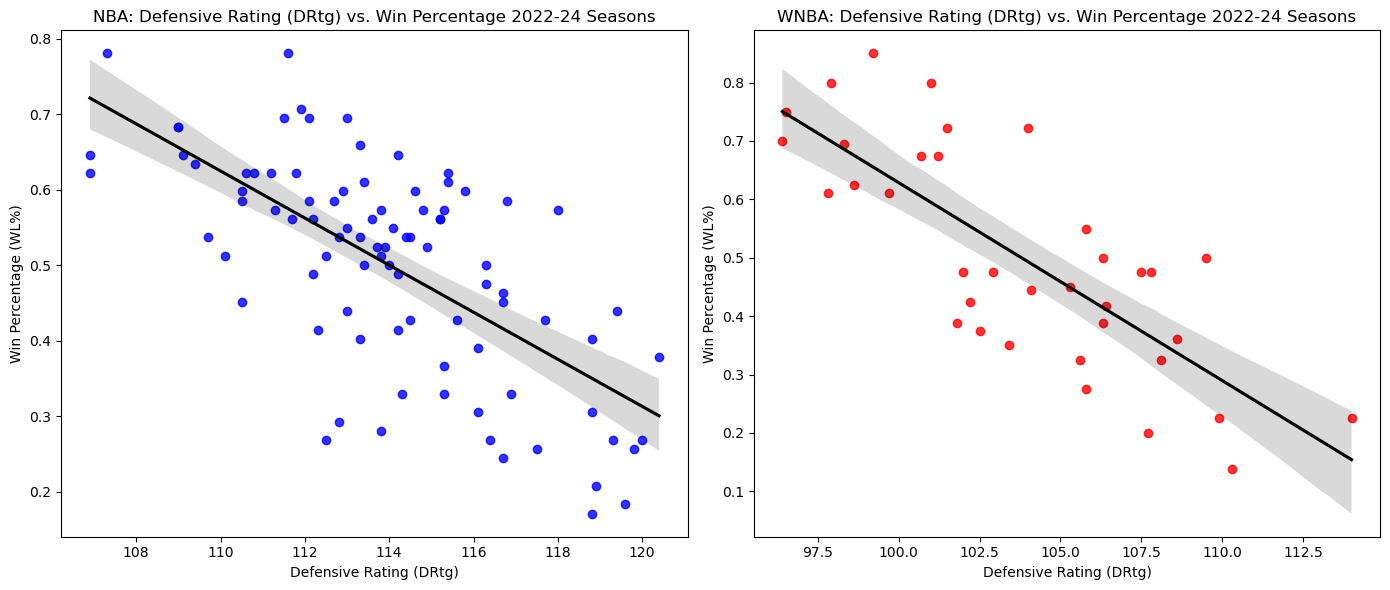

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ==== STEP 1: Load the Data ====
nba_file = "/Users/lizvitai/Documents/PythonSports/nba_teams_2022_2023_2024_team_misc.csv"
wnba_file = "/Users/lizvitai/Documents/PythonSports/wnba_advanced_stats_cleaned.csv"

df_nba = pd.read_csv(nba_file)
df_wnba = pd.read_csv(wnba_file)

# ==== STEP 2: Keep only the first row per team-season (remove ranking rows) ====
df_nba_cleaned = df_nba.groupby(["Team", "Season"]).first().reset_index()

# ==== STEP 3: Calculate Win Percentage (WL%) ====
df_nba_cleaned["WL%"] = df_nba_cleaned["W"] / (df_nba_cleaned["W"] + df_nba_cleaned["L"])
df_wnba["WL%"] = df_wnba["W"] / (df_wnba["W"] + df_wnba["L"])

# ==== STEP 4: Create Scatter Plots with Trend Lines ====
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# NBA Plot
sns.regplot(x=df_nba_cleaned["DRtg"], y=df_nba_cleaned["WL%"], scatter_kws={'color':'blue'}, line_kws={'color':'black'}, ax=axes[0])
axes[0].set_title("NBA: Defensive Rating (DRtg) vs. Win Percentage 2022-24 Seasons")
axes[0].set_xlabel("Defensive Rating (DRtg)")
axes[0].set_ylabel("Win Percentage (WL%)")

# WNBA Plot
sns.regplot(x=df_wnba["DRtg"], y=df_wnba["WL%"], scatter_kws={'color':'red'}, line_kws={'color':'black'}, ax=axes[1])
axes[1].set_title("WNBA: Defensive Rating (DRtg) vs. Win Percentage 2022-24 Seasons")
axes[1].set_xlabel("Defensive Rating (DRtg)")
axes[1].set_ylabel("Win Percentage (WL%)")

plt.tight_layout()
plt.show()

# ==== SAVE FIGURE TO PDF ====
pdf.savefig(fig)  # Save to the PDF
plt.close(fig)  # Close the figure to free memory


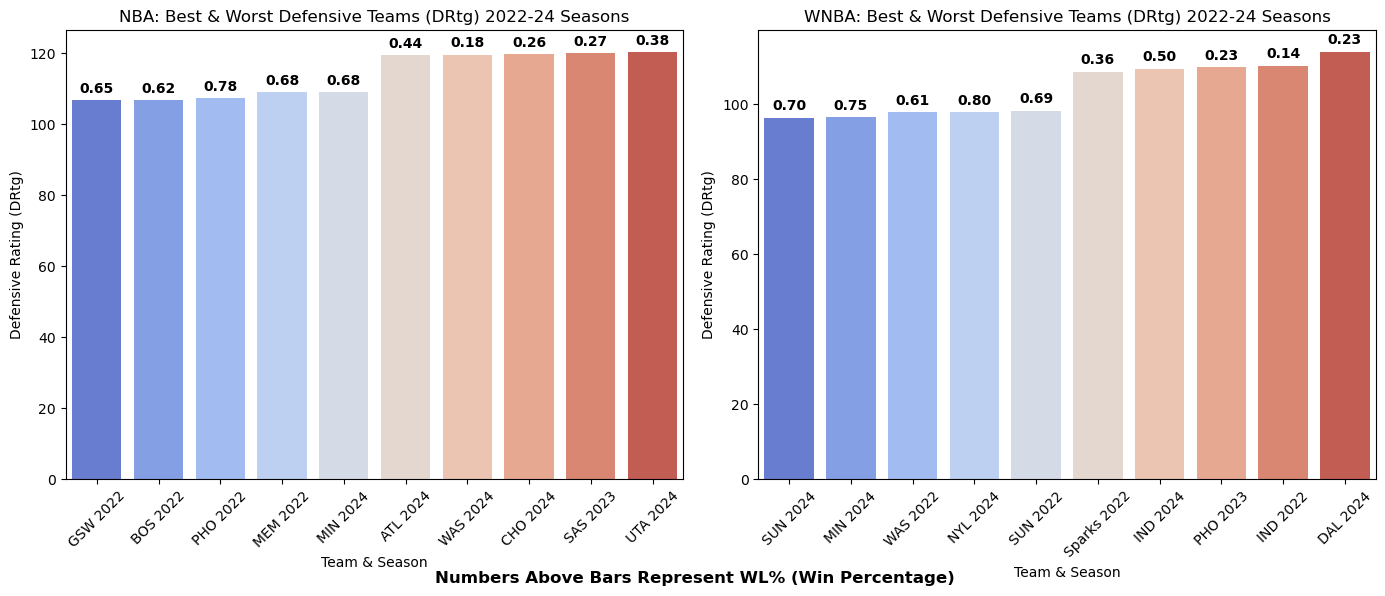

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==== STEP 1: Load Data ====
nba_file = "/Users/lizvitai/Documents/PythonSports/nba_teams_2022_2023_2024_team_misc.csv"
wnba_file = "/Users/lizvitai/Documents/PythonSports/wnba_advanced_stats_cleaned.csv"

df_nba = pd.read_csv(nba_file)
df_wnba = pd.read_csv(wnba_file)

# ==== STEP 2: Keep Only First Row Per Team-Season (Remove Ranking Rows) ====
df_nba_cleaned = df_nba.groupby(["Team", "Season"]).first().reset_index()
df_wnba_cleaned = df_wnba.groupby(["Team", "Season"]).first().reset_index()

# ==== STEP 3: Calculate Win Percentage (WL%) ====
df_nba_cleaned["WL%"] = df_nba_cleaned["W"] / (df_nba_cleaned["W"] + df_nba_cleaned["L"])
df_wnba_cleaned["WL%"] = df_wnba_cleaned["W"] / (df_wnba_cleaned["W"] + df_wnba_cleaned["L"])

# ==== STEP 4: Sort Teams by Defensive Rating (DRtg) ====
nba_sorted = df_nba_cleaned.sort_values(by="DRtg")
wnba_sorted = df_wnba_cleaned.sort_values(by="DRtg")

# Select Best (Lowest DRtg) and Worst (Highest DRtg) Defensive Teams
nba_best_def = nba_sorted.head(5)
nba_worst_def = nba_sorted.tail(5)
wnba_best_def = wnba_sorted.head(5)
wnba_worst_def = wnba_sorted.tail(5)

# Combine Best & Worst Defensive Teams
nba_defense = pd.concat([nba_best_def, nba_worst_def])
wnba_defense = pd.concat([wnba_best_def, wnba_worst_def])

# ==== STEP 5: Convert Team Names to Abbreviations ====
wnba_team_abbreviations = {
    "Atlanta Dream": "ATL", "Chicago Sky": "CHI", "Connecticut Sun": "SUN",
    "Dallas Wings": "DAL", "Indiana Fever": "IND", "Las Vegas Aces": "LVA",
    "Los Angeles Sparks": "Sparks", "Minnesota Lynx": "MIN", "New York Liberty": "NYL",
    "Phoenix Mercury": "PHO", "Seattle Storm": "SEA", "Washington Mystics": "WAS"
}

# Apply abbreviations
wnba_defense["Team"] = wnba_defense["Team"].replace(wnba_team_abbreviations)

# Create "Team & Season" column
nba_defense["Team_Season"] = nba_defense["Team"] + " " + nba_defense["Season"].astype(str)
wnba_defense["Team_Season"] = wnba_defense["Team"] + " " + wnba_defense["Season"].astype(int).astype(str)

# ==== STEP 6: Create the Bar Charts ====
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# NBA Plot
sns.barplot(x=nba_defense["Team_Season"], y=nba_defense["DRtg"], hue=nba_defense["Team_Season"], palette="coolwarm", legend=False, ax=axes[0])
axes[0].set_title("NBA: Best & Worst Defensive Teams (DRtg) 2022-24 Seasons")
axes[0].set_ylabel("Defensive Rating (DRtg)")
axes[0].set_xlabel("Team & Season")
axes[0].tick_params(axis='x', rotation=45)

# Add win percentage annotations **without "WL%"**
for i, value in enumerate(nba_defense["DRtg"]):
    axes[0].text(i, value + 2, f'{nba_defense["WL%"].iloc[i]:.2f}', ha='center', fontsize=10, fontweight='bold')

# WNBA Plot
sns.barplot(x=wnba_defense["Team_Season"], y=wnba_defense["DRtg"], hue=wnba_defense["Team_Season"], palette="coolwarm", legend=False, ax=axes[1])
axes[1].set_title("WNBA: Best & Worst Defensive Teams (DRtg) 2022-24 Seasons")
axes[1].set_ylabel("Defensive Rating (DRtg)")
axes[1].set_xlabel("Team & Season")
axes[1].tick_params(axis='x', rotation=45)

# Add win percentage annotations **without "WL%"**
for i, value in enumerate(wnba_defense["DRtg"]):
    axes[1].text(i, value + 2, f'{wnba_defense["WL%"].iloc[i]:.2f}', ha='center', fontsize=10, fontweight='bold')

# Add WL% Legend
fig.text(0.5, 0.02, "Numbers Above Bars Represent WL% (Win Percentage)", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ==== SAVE FIGURE TO PDF ====
pdf.savefig(fig)  # Save to the PDF
plt.close(fig)  # Close the figure to free memory


=== NBA T-Test for MOV (High vs. Low WL%) ===
T-Statistic: 10.518
P-Value: 0.00000 *
Effect Size (Cohen's d): 2.230 (Large Effect)


=== WNBA T-Test for MOV (High vs. Low WL%) ===
T-Statistic: 6.764
P-Value: 0.00000 *
Effect Size (Cohen's d): 2.214 (Large Effect)


=== NBA T-Test for DRtg (High vs. Low WL%) ===
T-Statistic: -5.761
P-Value: 0.00000 *
Effect Size (Cohen's d): -1.216 (Large Effect)


=== WNBA T-Test for DRtg (High vs. Low WL%) ===
T-Statistic: -3.840
P-Value: 0.00051 *
Effect Size (Cohen's d): -1.276 (Large Effect)




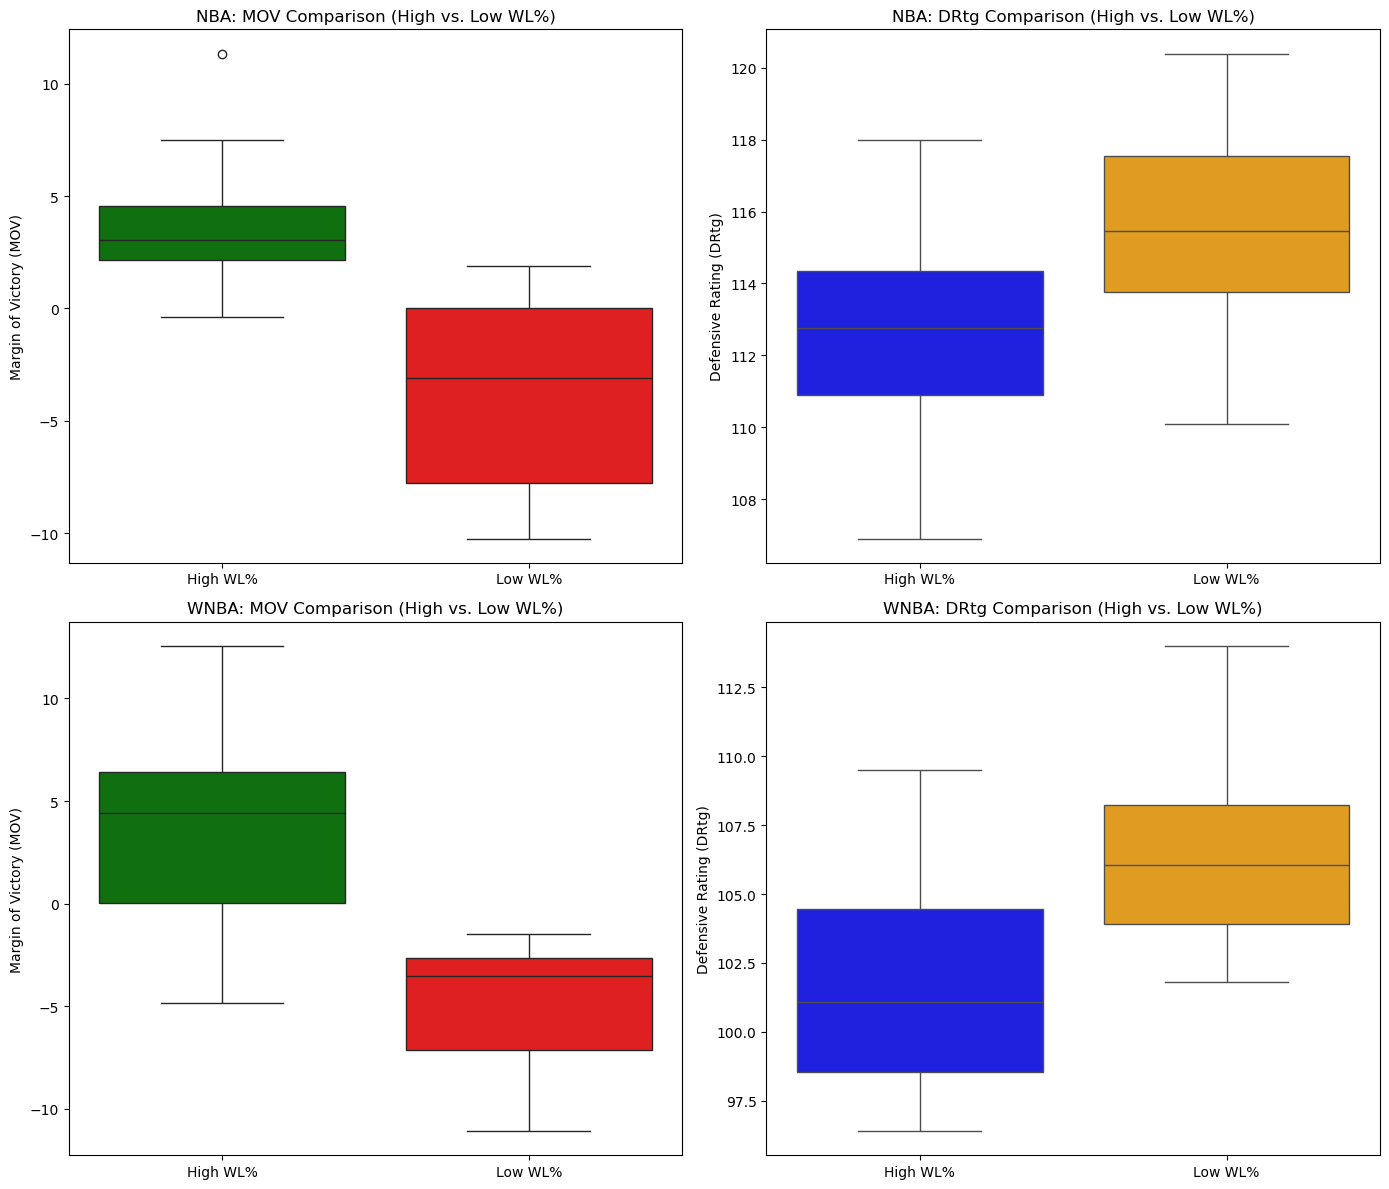

In [4]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==== Ensure "WL%" column exists ====
if "WL%" not in df_nba_cleaned.columns:
    df_nba_cleaned["WL%"] = df_nba_cleaned["W"] / (df_nba_cleaned["W"] + df_nba_cleaned["L"])
if "WL%" not in df_wnba_cleaned.columns:
    df_wnba_cleaned["WL%"] = df_wnba_cleaned["W"] / (df_wnba_cleaned["W"] + df_wnba_cleaned["L"])

# ==== Divide Teams into High & Low Win Percentage Groups ====
nba_median_wl = df_nba_cleaned["WL%"].median()
wnba_median_wl = df_wnba_cleaned["WL%"].median()

nba_high_wl = df_nba_cleaned[df_nba_cleaned["WL%"] >= nba_median_wl]
nba_low_wl = df_nba_cleaned[df_nba_cleaned["WL%"] < nba_median_wl]

wnba_high_wl = df_wnba_cleaned[df_wnba_cleaned["WL%"] >= wnba_median_wl]
wnba_low_wl = df_wnba_cleaned[df_wnba_cleaned["WL%"] < wnba_median_wl]

# ==== Run T-Tests for MOV and DRtg ====
def run_ttest(high_group, low_group, metric, league):
    """Run an independent t-test and calculate effect size (Cohen's d)."""
    t_stat, p_value = stats.ttest_ind(high_group[metric], low_group[metric], equal_var=False)
    
    # Compute Cohen's d effect size
    mean_diff = high_group[metric].mean() - low_group[metric].mean()
    pooled_std = np.sqrt((high_group[metric].std()**2 + low_group[metric].std()**2) / 2)
    cohen_d = mean_diff / pooled_std  # Effect size
    
    significance = "*" if p_value < 0.05 else ""
    effect_size_label = "(Large Effect)" if abs(cohen_d) > 0.8 else "(Medium Effect)" if abs(cohen_d) > 0.5 else "(Small Effect)"

    ttest_output = f"=== {league} T-Test for {metric} (High vs. Low WL%) ===\n"
    ttest_output += f"T-Statistic: {t_stat:.3f}\n"
    ttest_output += f"P-Value: {p_value:.5f} {significance}\n"
    ttest_output += f"Effect Size (Cohen's d): {cohen_d:.3f} {effect_size_label}\n\n"
    
    print(ttest_output)  # Print to console

    return ttest_output  # Return text for saving

# Run T-tests and store results
ttest_results = ""
ttest_results += run_ttest(nba_high_wl, nba_low_wl, "MOV", "NBA")
ttest_results += run_ttest(wnba_high_wl, wnba_low_wl, "MOV", "WNBA")
ttest_results += run_ttest(nba_high_wl, nba_low_wl, "DRtg", "NBA")
ttest_results += run_ttest(wnba_high_wl, wnba_low_wl, "DRtg", "WNBA")

# ==== Save T-Test Results to PDF ====
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis("off")  # Hide axes
ax.text(0, 1, ttest_results, fontsize=10, va="top", fontfamily="monospace")
ax.set_title("T-Test Results: High vs. Low WL%", fontsize=12, fontweight="bold")

pdf.savefig(fig)  # Save to the PDF
plt.close(fig)  # Close figure

# ==== Create Side-by-Side Boxplots for NBA & WNBA MOV and DRtg ====
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# NBA MOV Boxplot
sns.boxplot(x=["High WL%"] * len(nba_high_wl) + ["Low WL%"] * len(nba_low_wl), 
            y=nba_high_wl["MOV"].tolist() + nba_low_wl["MOV"].tolist(), 
            hue=["High WL%"] * len(nba_high_wl) + ["Low WL%"] * len(nba_low_wl), 
            ax=axes[0, 0], palette=["green", "red"], legend=False)
axes[0, 0].set_title("NBA: MOV Comparison (High vs. Low WL%)")
axes[0, 0].set_ylabel("Margin of Victory (MOV)")

# NBA DRtg Boxplot
sns.boxplot(x=["High WL%"] * len(nba_high_wl) + ["Low WL%"] * len(nba_low_wl), 
            y=nba_high_wl["DRtg"].tolist() + nba_low_wl["DRtg"].tolist(), 
            hue=["High WL%"] * len(nba_high_wl) + ["Low WL%"] * len(nba_low_wl), 
            ax=axes[0, 1], palette=["blue", "orange"], legend=False)
axes[0, 1].set_title("NBA: DRtg Comparison (High vs. Low WL%)")
axes[0, 1].set_ylabel("Defensive Rating (DRtg)")

# WNBA MOV Boxplot
sns.boxplot(x=["High WL%"] * len(wnba_high_wl) + ["Low WL%"] * len(wnba_low_wl), 
            y=wnba_high_wl["MOV"].tolist() + wnba_low_wl["MOV"].tolist(), 
            hue=["High WL%"] * len(wnba_high_wl) + ["Low WL%"] * len(wnba_low_wl), 
            ax=axes[1, 0], palette=["green", "red"], legend=False)
axes[1, 0].set_title("WNBA: MOV Comparison (High vs. Low WL%)")
axes[1, 0].set_ylabel("Margin of Victory (MOV)")

# WNBA DRtg Boxplot
sns.boxplot(x=["High WL%"] * len(wnba_high_wl) + ["Low WL%"] * len(wnba_low_wl), 
            y=wnba_high_wl["DRtg"].tolist() + wnba_low_wl["DRtg"].tolist(), 
            hue=["High WL%"] * len(wnba_high_wl) + ["Low WL%"] * len(wnba_low_wl), 
            ax=axes[1, 1], palette=["blue", "orange"], legend=False)
axes[1, 1].set_title("WNBA: DRtg Comparison (High vs. Low WL%)")
axes[1, 1].set_ylabel("Defensive Rating (DRtg)")

# Adjust layout and save the figure
plt.tight_layout()
plt.show()

# ==== SAVE FIGURE TO PDF ====
pdf.savefig(fig)  # Save to the PDF
plt.close(fig)  # Close the figure to free memory


In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure we are using the correct cleaned NBA dataset
df_nba_cleaned = df_nba.groupby(["Team", "Season"]).first().reset_index()  # Ensure only first row per team-season

# Define function to calculate VIF
def calculate_vif(df, features):
    X = df[features]
    X = sm.add_constant(X)  # Add constant term for VIF calculation
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Define features to check for multicollinearity
features = ["MOV", "ORtg", "DRtg"]  # Adjust if needed

# Calculate VIF for NBA dataset
vif_nba = calculate_vif(df_nba_cleaned, features)
print("=== NBA Variance Inflation Factor (VIF) ===")
print(vif_nba)

# Calculate VIF for WNBA dataset
vif_wnba = calculate_vif(df_wnba, features)
print("\n=== WNBA Variance Inflation Factor (VIF) ===")
print(vif_wnba)

import matplotlib.pyplot as plt

# Create a figure for VIF text output
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis("off")  # Hide axes

# Format text for the figure
text = f"=== NBA Variance Inflation Factor (VIF) ===\n{vif_nba.to_string(index=False)}\n\n"
text += f"=== WNBA Variance Inflation Factor (VIF) ===\n{vif_wnba.to_string(index=False)}"

# Add text to figure
ax.text(0, 1, text, fontsize=10, va="top", fontfamily="monospace", wrap=True)
ax.set_title("Variance Inflation Factor (VIF) Analysis", fontsize=12, fontweight="bold")

# Save figure to PDF
pdf.savefig(fig)  # Append to your ONE PDF
plt.close(fig)  # Close to free memory


=== NBA Variance Inflation Factor (VIF) ===
  Feature          VIF
0   const  2728.650268
1     MOV  2917.594575
2    ORtg  1529.439681
3    DRtg  1160.020297

=== WNBA Variance Inflation Factor (VIF) ===
  Feature          VIF
0   const  2134.350673
1     MOV  3358.229588
2    ORtg  1246.730572
3    DRtg  1167.965150


=== NBA Regression Summary ===
                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1152.
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           2.46e-52
Time:                        13:55:05   Log-Likelihood:                -228.87
No. Observations:                  90   AIC:                             461.7
Df Residuals:                      88   BIC:                             466.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.0013

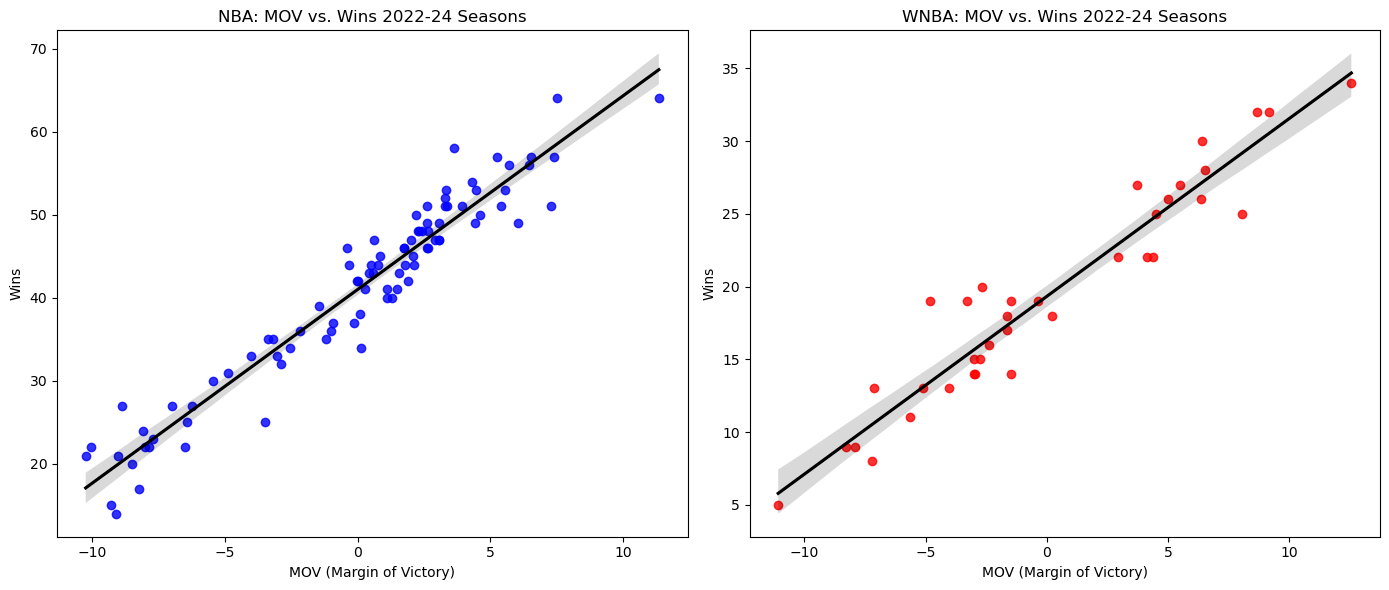

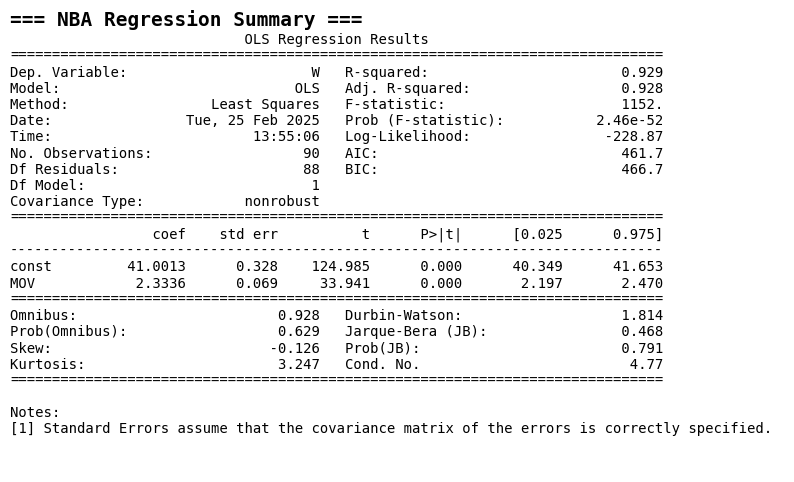

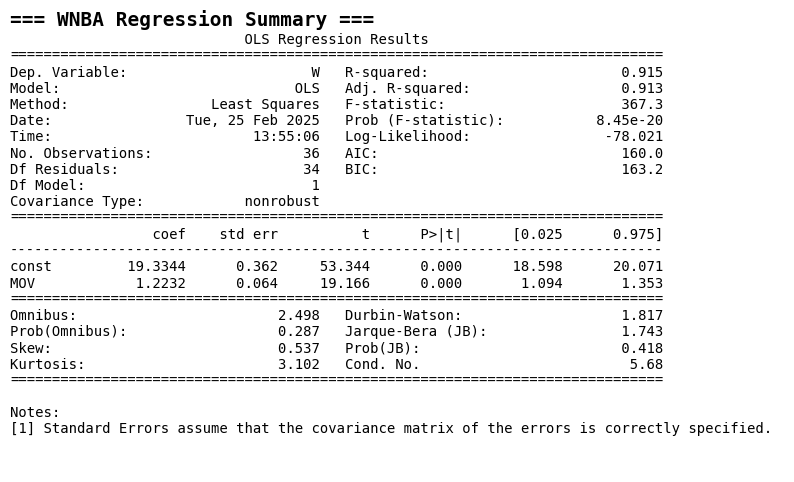

✅ PDF saved successfully at: /Users/lizvitai/Documents/PythonSports/all_graphs.pdf


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# ==== Load Data ====
nba_file = "/Users/lizvitai/Documents/PythonSports/nba_teams_2022_2023_2024_team_misc.csv"
wnba_file = "/Users/lizvitai/Documents/PythonSports/wnba_advanced_stats_cleaned.csv"

df_nba = pd.read_csv(nba_file)
df_wnba = pd.read_csv(wnba_file)

# ==== Keep Only First Row Per Team-Season ====
df_nba_cleaned = df_nba.groupby(["Team", "Season"]).first().reset_index()

# ==== Define Features & Target ====
X_nba = df_nba_cleaned[["MOV"]]
y_nba = df_nba_cleaned["W"]
X_nba = sm.add_constant(X_nba)  # Add intercept

X_wnba = df_wnba[["MOV"]]
y_wnba = df_wnba["W"]
X_wnba = sm.add_constant(X_wnba)  # Add intercept

# ==== Run Regression Models ====
nba_model = sm.OLS(y_nba, X_nba).fit()
wnba_model = sm.OLS(y_wnba, X_wnba).fit()

# ==== Print Regression Summaries to Console ====
print("=== NBA Regression Summary ===")
print(nba_model.summary())
print("\n=== WNBA Regression Summary ===")
print(wnba_model.summary())

# ==== Scatter Plots with Regression Lines ====
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# NBA Scatter Plot
sns.regplot(x=df_nba_cleaned["MOV"], y=df_nba_cleaned["W"], scatter_kws={"color": "blue"}, line_kws={"color": "black"}, ax=axes[0])
axes[0].set_title("NBA: MOV vs. Wins 2022-24 Seasons")
axes[0].set_xlabel("MOV (Margin of Victory)")
axes[0].set_ylabel("Wins")

# WNBA Scatter Plot
sns.regplot(x=df_wnba["MOV"], y=df_wnba["W"], scatter_kws={"color": "red"}, line_kws={"color": "black"}, ax=axes[1])
axes[1].set_title("WNBA: MOV vs. Wins 2022-24 Seasons")
axes[1].set_xlabel("MOV (Margin of Victory)")
axes[1].set_ylabel("Wins")

plt.tight_layout()
plt.show()  # ✅ Show the plot
pdf.savefig(fig)  # ✅ Save to PDF
plt.close(fig)  # Free memory

# ==== Convert Regression Summaries to Text and Save as Images ====
def save_summary_to_pdf(model_summary, title, pdf):
    """Convert model summary text to an image and save to PDF."""
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis("off")  # Hide axes
    ax.text(0, 1, title, fontsize=14, fontweight="bold", va="top", fontfamily="monospace")
    ax.text(0, 0.95, model_summary, fontsize=10, va="top", fontfamily="monospace", wrap=True)
    pdf.savefig(fig)  # ✅ Save to PDF
    plt.show()  # ✅ Show the text output
    plt.close(fig)  # Free memory

# Convert regression summaries to text
nba_summary_text = nba_model.summary().as_text()
wnba_summary_text = wnba_model.summary().as_text()

# Save regression summaries to the PDF
save_summary_to_pdf(nba_summary_text, "=== NBA Regression Summary ===", pdf)
save_summary_to_pdf(wnba_summary_text, "=== WNBA Regression Summary ===", pdf)

# ✅ Final Step: Close the PDF at the END of your notebook (not in this cell)
print(f"✅ PDF saved successfully at: {pdf_path}")


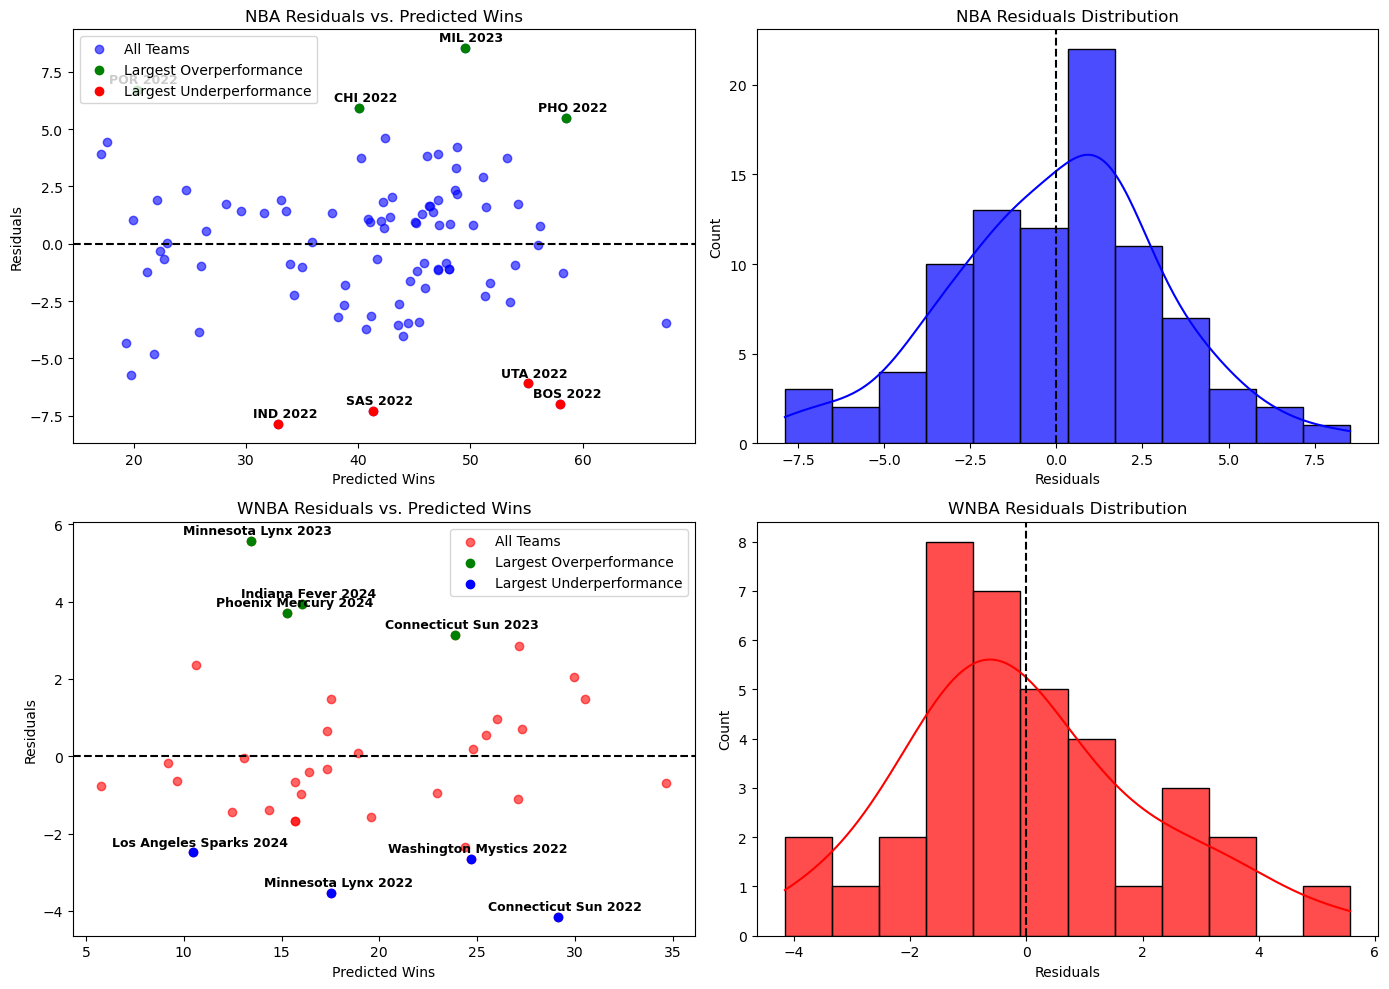


✅ PDF saved successfully at: /Users/lizvitai/Documents/PythonSports/all_graphs.pdf


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# ==== Load Data ====
nba_file = "/Users/lizvitai/Documents/PythonSports/nba_teams_2022_2023_2024_team_misc.csv"
wnba_file = "/Users/lizvitai/Documents/PythonSports/wnba_advanced_stats_cleaned.csv"

df_nba = pd.read_csv(nba_file)
df_wnba = pd.read_csv(wnba_file)

# ==== Keep Only First Row Per Team-Season ====
df_nba_cleaned = df_nba.groupby(["Team", "Season"]).first().reset_index()
df_wnba_cleaned = df_wnba.groupby(["Team", "Season"]).first().reset_index()

# ==== Define Features & Target ====
X_nba = df_nba_cleaned[["MOV"]]
y_nba = df_nba_cleaned["W"]
X_nba = sm.add_constant(X_nba)  # Add intercept

X_wnba = df_wnba_cleaned[["MOV"]]
y_wnba = df_wnba_cleaned["W"]
X_wnba = sm.add_constant(X_wnba)  # Add intercept

# ==== Run Regression Models ====
nba_model = sm.OLS(y_nba, X_nba).fit()
wnba_model = sm.OLS(y_wnba, X_wnba).fit()

# ==== Compute Residuals ====
df_nba_cleaned["Predicted_Wins"] = nba_model.predict(X_nba)
df_nba_cleaned["Residuals"] = df_nba_cleaned["W"] - df_nba_cleaned["Predicted_Wins"]

df_wnba_cleaned["Predicted_Wins"] = wnba_model.predict(X_wnba)
df_wnba_cleaned["Residuals"] = df_wnba_cleaned["W"] - df_wnba_cleaned["Predicted_Wins"]

# ==== Identify 4 Biggest Residuals ====
top_nba_residuals = df_nba_cleaned.nlargest(4, "Residuals")
bottom_nba_residuals = df_nba_cleaned.nsmallest(4, "Residuals")

top_wnba_residuals = df_wnba_cleaned.nlargest(4, "Residuals")
bottom_wnba_residuals = df_wnba_cleaned.nsmallest(4, "Residuals")

# ==== Plot Residuals ====
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- NBA Residuals vs Predicted Wins ---
axes[0, 0].scatter(df_nba_cleaned["Predicted_Wins"], df_nba_cleaned["Residuals"], color="blue", alpha=0.6, label="All Teams")
axes[0, 0].scatter(top_nba_residuals["Predicted_Wins"], top_nba_residuals["Residuals"], color="green", label="Largest Overperformance")
axes[0, 0].scatter(bottom_nba_residuals["Predicted_Wins"], bottom_nba_residuals["Residuals"], color="red", label="Largest Underperformance")

# Label top residual teams
for _, row in pd.concat([top_nba_residuals, bottom_nba_residuals]).iterrows():
    axes[0, 0].annotate(f"{row['Team']} {int(row['Season'])}", (row["Predicted_Wins"], row["Residuals"]), 
                         textcoords="offset points", xytext=(5,5), ha='center', fontsize=9, weight='bold')

axes[0, 0].axhline(0, color="black", linestyle="dashed")
axes[0, 0].set_title("NBA Residuals vs. Predicted Wins")
axes[0, 0].set_xlabel("Predicted Wins")
axes[0, 0].set_ylabel("Residuals")
axes[0, 0].legend()

# --- NBA Residual Histogram ---
sns.histplot(df_nba_cleaned["Residuals"], bins=12, kde=True, color="blue", ax=axes[0, 1], alpha=0.7)
axes[0, 1].axvline(0, color="black", linestyle="dashed")
axes[0, 1].set_title("NBA Residuals Distribution")
axes[0, 1].set_xlabel("Residuals")

# --- WNBA Residuals vs Predicted Wins ---
axes[1, 0].scatter(df_wnba_cleaned["Predicted_Wins"], df_wnba_cleaned["Residuals"], color="red", alpha=0.6, label="All Teams")
axes[1, 0].scatter(top_wnba_residuals["Predicted_Wins"], top_wnba_residuals["Residuals"], color="green", label="Largest Overperformance")
axes[1, 0].scatter(bottom_wnba_residuals["Predicted_Wins"], bottom_wnba_residuals["Residuals"], color="blue", label="Largest Underperformance")

# Label top residual teams
for _, row in pd.concat([top_wnba_residuals, bottom_wnba_residuals]).iterrows():
    axes[1, 0].annotate(f"{row['Team']} {int(row['Season'])}", (row["Predicted_Wins"], row["Residuals"]), 
                         textcoords="offset points", xytext=(5,5), ha='center', fontsize=9, weight='bold')

axes[1, 0].axhline(0, color="black", linestyle="dashed")
axes[1, 0].set_title("WNBA Residuals vs. Predicted Wins")
axes[1, 0].set_xlabel("Predicted Wins")
axes[1, 0].set_ylabel("Residuals")
axes[1, 0].legend()

# --- WNBA Residual Histogram ---
sns.histplot(df_wnba_cleaned["Residuals"], bins=12, kde=True, color="red", ax=axes[1, 1], alpha=0.7)
axes[1, 1].axvline(0, color="black", linestyle="dashed")
axes[1, 1].set_title("WNBA Residuals Distribution")
axes[1, 1].set_xlabel("Residuals")

plt.tight_layout()
plt.show()

# ==== SAVE FIGURE TO PDF ====
pdf.savefig(fig)  # Save to the PDF
plt.close(fig)  # Close the figure to free memory
pdf.close()  # Finalize and properly save all_graphs.pdf
print(f"\n✅ PDF saved successfully at: {pdf_path}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.backends.backend_pdf import PdfPages

# ==== Load Data ====
nba_file = "/Users/lizvitai/Documents/PythonSports/nba_teams_2022_2023_2024_team_misc.csv"
wnba_file = "/Users/lizvitai/Documents/PythonSports/wnba_advanced_stats_cleaned.csv"

df_nba = pd.read_csv(nba_file)
df_wnba = pd.read_csv(wnba_file)

# ==== Keep Only First Row Per Team-Season ====
df_nba_cleaned = df_nba.groupby(["Team", "Season"]).first().reset_index()
df_wnba_cleaned = df_wnba.groupby(["Team", "Season"]).first().reset_index()

# ==== Define Features & Target ====
X_nba = df_nba_cleaned[["MOV"]]
y_nba = df_nba_cleaned["W"]
X_nba = sm.add_constant(X_nba)

X_wnba = df_wnba_cleaned[["MOV"]]
y_wnba = df_wnba_cleaned["W"]
X_wnba = sm.add_constant(X_wnba)

# ==== Run Regression Models ====
nba_model = sm.OLS(y_nba, X_nba).fit()
wnba_model = sm.OLS(y_wnba, X_wnba).fit()

# ==== Make Predictions & Calculate Residuals ====
df_nba_cleaned["Predicted_Wins"] = nba_model.predict(X_nba)
df_nba_cleaned["Residual"] = df_nba_cleaned["W"] - df_nba_cleaned["Predicted_Wins"]

df_wnba_cleaned["Predicted_Wins"] = wnba_model.predict(X_wnba)
df_wnba_cleaned["Residual"] = df_wnba_cleaned["W"] - df_wnba_cleaned["Predicted_Wins"]

# ==== Handle WNBA Team Naming (Convert Full Names to Abbreviations) ====
wnba_team_mapping = {
    "Atlanta Dream": "ATL",
    "Chicago Sky": "CHI",
    "Connecticut Sun": "CON",
    "Dallas Wings": "DAL",
    "Indiana Fever": "IND",
    "Las Vegas Aces": "LVA",
    "Los Angeles Sparks": "LA",
    "Minnesota Lynx": "MIN",
    "New York Liberty": "NY",
    "Phoenix Mercury": "PHO",
    "Seattle Storm": "SEA",
    "Washington Mystics": "WAS"
}

# Reverse mapping for lookup
wnba_abbreviation_mapping = {v: k for k, v in wnba_team_mapping.items()}

# ==== Initialize PDF to Save All Plots ====
pdf_path = "/Users/lizvitai/Documents/PythonSports/interactive_output.pdf"
pdf = PdfPages(pdf_path)

# ==== User Input for Team & League ====
selected_league = input("Enter league (NBA or WNBA): ").strip().upper()
selected_team = input("Enter team (Abbreviation for NBA, Full Name or Abbreviation for WNBA): ").strip()

# ==== Select Dataset Based on League ====
if selected_league == "NBA":
    df = df_nba_cleaned
    color = "blue"
    intercept = nba_model.params["const"]
    mov_coefficient = nba_model.params["MOV"]

elif selected_league == "WNBA":
    df = df_wnba_cleaned
    color = "red"
    intercept = wnba_model.params["const"]
    mov_coefficient = wnba_model.params["MOV"]
    
    # Normalize team name to full name if the abbreviation was entered
    if selected_team in wnba_abbreviation_mapping:
        selected_team = wnba_abbreviation_mapping[selected_team]  # Convert abbreviation to full name

else:
    print("Invalid league entered. Please enter 'NBA' or 'WNBA'.")
    pdf.close()
    exit()

# ==== Check if Team Exists ====
if selected_team not in df["Team"].values:
    print(f"Error: Team '{selected_team}' not found in {selected_league} dataset.")
    pdf.close()
    exit()

# ==== Get Team's Data ====
team_data = df[df["Team"] == selected_team]

# ==== Extract Values for Plotting ====
actual_wins = team_data["W"].values
predicted_wins = team_data["Predicted_Wins"].values
residuals = team_data["Residual"].values
seasons = team_data["Season"].values
actual_mov = team_data["MOV"].values

# Determine if the team overperformed or underperformed
performance_type = ["Overperformed" if res > 0 else "Underperformed" for res in residuals]

# ==== PLOT: Residuals Scatter Plot ====
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=df["Predicted_Wins"], y=df["Residual"], color=color, alpha=0.5, label="All Teams", ax=ax)

# Highlight the selected team
for i, season in enumerate(seasons):
    ax.scatter(predicted_wins[i], residuals[i], color="black", s=100, edgecolor="white")
    ax.text(predicted_wins[i], residuals[i], f"{selected_team} {season}", fontsize=10, ha="right", fontweight="bold")

ax.axhline(y=0, linestyle="dashed", color="black")
ax.set_xlabel("Predicted Wins")
ax.set_ylabel("Residuals")
ax.set_title(f"{selected_league} Residuals vs. Predicted Wins ({selected_team})")
ax.legend()
plt.tight_layout()
plt.show()

# Save to PDF
pdf.savefig(fig)
plt.close(fig)

# ==== INTERPRETATION ====
interactive_output = f"=== {selected_team} Performance Summary ===\n"
for i, season in enumerate(seasons):
    interactive_output += (
        f"\nSeason {season}:\n"
        f"   - Actual MOV: {actual_mov[i]:.2f}\n"
        f"   - Actual Wins: {actual_wins[i]}\n"
        f"   - Predicted Wins: {predicted_wins[i]:.2f}\n"
        f"   - Residual: {residuals[i]:.2f} ({performance_type[i]})\n"
    )

print(interactive_output)  # Show in console

# ==== USER ADJUSTS MOV FOR A SEASON ====
selected_season = int(input(f"Enter season to adjust MOV for {selected_team} (e.g., 2022, 2023, 2024): "))
if selected_season not in seasons:
    print(f"Error: {selected_season} not found for {selected_team}.")
    pdf.close()
    exit()

# Find the MOV for the selected season
mov_index = list(seasons).index(selected_season)
current_mov = actual_mov[mov_index]

print(f"\nCurrent MOV for {selected_team} in {selected_season}: {current_mov:.2f}")
new_mov = float(input("Enter a new MOV value: "))

# Calculate new predicted wins using regression model
new_predicted_wins = intercept + (mov_coefficient * new_mov)

adjusted_output = (
    f"\nIf {selected_team} had an MOV of {new_mov:.2f} in {selected_season}, "
    f"their predicted wins would be: {new_predicted_wins:.2f}"
)
print(adjusted_output)

# ==== Save Interactive Output to PDF ====
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis("off")  # Hide axes
ax.text(0, 1, interactive_output + adjusted_output, fontsize=10, va="top", fontfamily="monospace", wrap=True)
ax.set_title("Interactive Model Output", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()
pdf.savefig(fig)  # Save to PDF
plt.close(fig)

# ==== FINALIZE THE PDF ====
pdf.close()
print(f"\nPDF saved successfully at: {pdf_path}")
